## Reduce Overfitting by Using Pre-trained Embedding Vectors   

In [0]:
!pip3 install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
keras = tf.keras
print ("check tensorflow version: ", tf.__version__)
print ("keras version: ", keras.__version__)

check tensorflow version:  2.0.0-beta0
keras version:  2.2.4-tf


#### Description of the Dataset 

The dataset we will use is the [Sentiment140](https://www.kaggle.com/kazanova/sentiment140). It contains 16 million tweetsand they are annotated as 0, 2, 4. Where, 0 denotes negative, 2 denotes neutral and 4 denotes positive sentiments. Official paper related to this dataset and analyis can be found [here](https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf). Let;s mount our drive and start exploring the dataset.   
!!!! The dataset available in Kaggle _does not have any tweets with neutral sentiments_!!!!  

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [78]:
import json, csv
import pandas as pd
import random

sent_data_path = '/content/gdrive/My Drive/Colab Notebooks/NLP_Week3/training_cleaned.csv' # choose the clean one if you want to avoid 
# data cleaning steps

# DATASET_ENCODING = "ISO-8859-1"
Col_names = ["label", "ids", "date", "flag", "user", "tweet"]

# encoding=DATASET_ENCODING,

sent_df = pd.read_csv(sent_data_path, delimiter=',',  names=Col_names)

# print (sent_df.head(3))
print ("shape of the dataframe:", sent_df.shape) # 6 columns 

# will drop every columns except the target and tweet column 


new_sent_df = sent_df.drop(['ids', 'date', 'flag', 'user'], axis=1)

print ("after dropping columns :", new_sent_df.tail(3))

print ("check some tweets: \n")
print (new_sent_df[['tweet']][45:47])




# corpus = []
# num_sentences = 0

# with open("/content/gdrive/My Drive/Colab Notebooks/NLP_Week3/training_cleaned.csv") as csvfile:
#     reader = csv.reader(csvfile, delimiter=',')
#     for row in reader:
#         list_item=[]
#         list_item.append(row[5])
#         this_label=row[0]
#         if this_label=='0':
#             list_item.append(0)
#         else:

#             list_item.append(1)
#         num_sentences = num_sentences + 1
#         corpus.append(list_item)

shape of the dataframe: (1600000, 6)
after dropping columns :          label                                              tweet
1599997      4  Are you ready for your MoJo Makeover? Ask me f...
1599998      4  Happy 38th Birthday to my boo of alll time!!! ...
1599999      4  happy #charitytuesday @theNSPCC @SparksCharity...
check some tweets: 

                                                tweet
45  @Viennah Yay! I'm happy for you with your job!...
46  Just checked my user timeline on my blackberry...


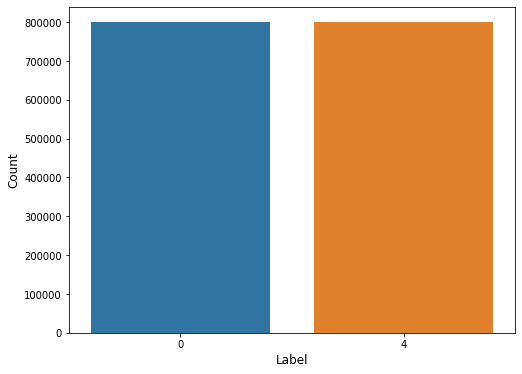

counts of labels:  4    800000
0    800000
Name: label, dtype: int64


In [79]:
### check the distribution of the labels 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(new_sent_df['label'])
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12) 
plt.show()

print("counts of labels: ", new_sent_df['label'].value_counts())# no neutral sentiments

In [0]:
from PIL import Image
import numpy as np

#### Try to Use Word Clouds for Tweets Associated with Positive and Negative Sentiments Separately  

Tutorials followed for generation of the wordclouds can be found [here](https://www.pluralsight.com/guides/natural-language-processing-visualizing-text-data-using-word-cloud) and [here](https://www.datacamp.com/community/tutorials/wordcloud-python). 


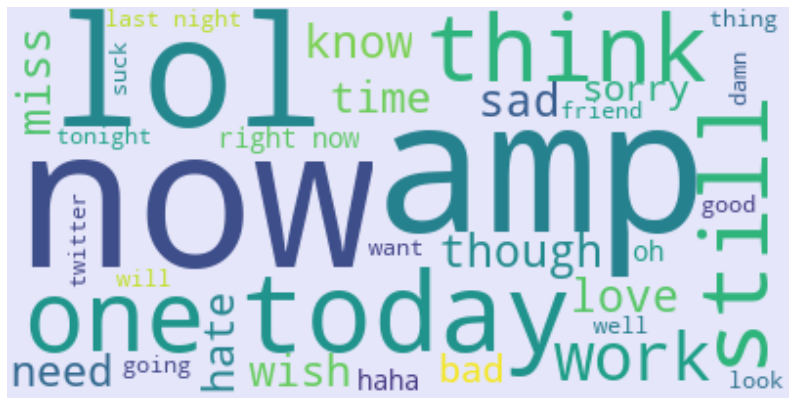

In [0]:
### Create two mini dataframes where label == 0 and in another label==4
neg_sent = new_sent_df[new_sent_df.label==0]  
# print ("dataframe of negative sentiments shape: ", neg_sent.shape)
pos_sent = new_sent_df[new_sent_df.label==4]


all_neg_sent = neg_sent['tweet'].str.split()
# print("dataframe after removing puctuations :", all_neg_sent.head(3))

# remove all  punctuations and for that we will use string.punctuations (https://www.geeksforgeeks.org/string-punctuation-in-python/)
import string

all_neg_sent_clean = []


for tweet in all_neg_sent:
  tweet = [x.strip(string.punctuation) for x in tweet]
  all_neg_sent_clean.append(tweet)

# print ("check an e160000lement from the cleaned list: ", all_neg_sent_clean[1])  
160000
tweet_neg = [" ".joi160000n(word) for word in all_neg_sent_clean]
final_tweet_neg = " 160000".join(tweet_neg) #type string 
160000
# print("check few individual letters: ", final_tweet_neg[:10])
# print("number of elements non the list: ", len(final_tweet_neg))
# 

# after first viewing without setting stopwords, I have updated the stopwords list

from wordcloud import WordCloud, STOPWORDS
stopwrds = set(STOPWORDS)
stopwrds.update(["quot", "got"])

# wcld = WordCloud(background_color='lavender', stopwords=stopwrds, max_words=35).generate(final_tweet_neg)
# plt.figure(figsize=(14, 12))
# plt.imshow(wcld, interpolation='bilinear')
# plt.axis("off")
# plt.show()

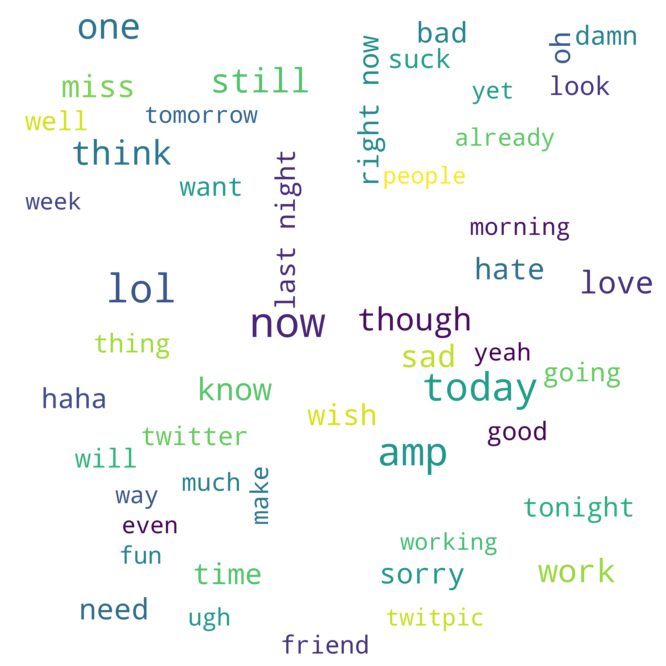

In [0]:
### Spice up the Word Cloud Plot Little More 


tweet_mask_img = '/content/gdrive/My Drive/Colab Notebooks/NLP_Week3/black_circ.png'
tweet_mask_im_arr = np.array(Image.open(tweet_mask_img))
tweet_mask_im_arr_reshaped =  tweet_mask_im_arr.reshape((tweet_mask_im_arr.shape[0], -1), order='F')

def trans_form(val):
  if val==0:
    return 255.
  else:
    return val

# transform_tweet_mask = np.ndarray((tweet_mask_im_arr_reshaped.shape[0], tweet_mask_im_arr_reshaped.shape[1]), np.int32)
# 
# for i in range(len(tweet_mask_im_arr_reshaped)):
  # transform_tweet_mask[i] = list(map(trans_form, tweet_mask_im_arr_reshaped[i]))

wc_neg = WordCloud(background_color='white', max_words=50, mask=tweet_mask_im_arr, stopwords=stopwrds, contour_color='magenta').generate(final_tweet_neg)
plt.figure(figsize=(14, 12))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/NLP_Week3/Wd_cld_neg_sent.png', dpi=300)
plt.show()


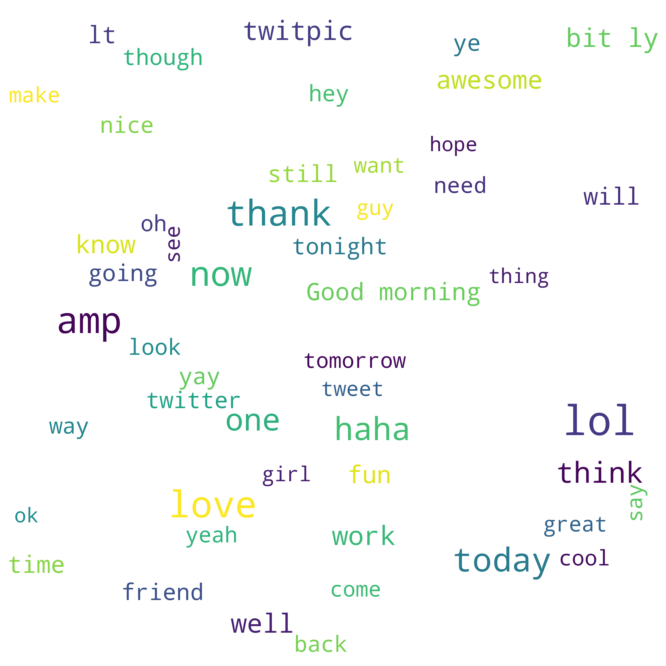

In [0]:
## check the positive semtiments 

all_pos_sent = pos_sent['tweet'].str.split()

all_pos_sent_clean = []


for tweet in all_pos_sent:
  tweet_pos = [x.strip(string.punctuation) for x in tweet]
  all_pos_sent_clean.append(tweet_pos)

# print ("check an element from the cleaned list: ", all_neg_sent_clean[1])  

tweet_pos = [" ".join(word) for word in all_pos_sent_clean]
final_tweet_pos = " ".join(tweet_pos)


wc_pos = WordCloud(background_color='white', max_words=50, mask=tweet_mask_im_arr, stopwords=stopwrds, contour_color='magenta').generate(final_tweet_pos)
plt.figure(figsize=(14, 12))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/NLP_Week3/Wd_cld_pos_sent.png', dpi=300)
plt.show()



#### Post Processing and Using Tokenizer

In [0]:
new_sent_df1 = new_sent_df.sample(n=int(len(new_sent_df)*0.1), random_state=42)

In [87]:

tweets_list = new_sent_df1['tweet'].tolist()
labels_list = new_sent_df1['label'].tolist()
labels_list_updated = []


for ik in range(len(labels_list)):
  if labels_list[ik] ==0:
    labels_list_updated.append(0)
  else:
    labels_list_updated.append(1)  



# sentencesc=[]
# labelsc=[]
# random.shuffle(corpus)
# for x in range(1600000):
#     sentencesc.append(corpus[x][0])
#     labelsc.append(corpus[x][1])


from sklearn.model_selection import  train_test_split


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

embed_dim = 100
trunc_type = 'post'
pad_type = 'post'
max_len = 16

tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n')
tokenizer.fit_on_texts(tweets_list)
word_index = tokenizer.word_index


print("length of word_index: ", len(word_index))
# print("length of word indexc: ", len(word_indexc))


sequences = tokenizer.texts_to_sequences(tweets_list)
padded = pad_sequences(sequences, maxlen=max_len, padding=pad_type, truncating=trunc_type)


training_size = int(len(sent_df) * 0.1)
test_portion = 0.1

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels_list_updated[0:split]
training_labels = labels_list_updated[split:training_size]



# train_padded, test_padded, train_label, test_label = train_test_split(padded, labels_list, test_size = 0.1, random_state=20)

# test_sequences = tokenizer.texts_to_sequences(test_padded)
# test_padded = pad_sequences(test_sequences, maxlen=max_len, padding=pad_type, truncating=trunc_type)

# print ("check length of training data, padded seq: ", len(train_padded))
# print("check length of test data padded seq: ", len(test_padded)) 
# print("check one of the padded seq, test data: ", test_padded[900])
# print ("check corresponding words: ", )


print ("check some tweets and labels:", tweets_list[45:47], labels_list_updated[45:47])

length of word_index:  139049
check some tweets and labels: ["My hands are officially tied. I don't think I'll have time for anything anymore  This includes the California meet ", '@Konstantine I said &quot;scar,&quot; sweetie. '] [0, 1]


### Use Pretrained Word Vectors 

To avoid overfitting,  as we have seen in the previous notebook where we have generated embedding only from a small training set, we use pre-trained word vectors. Here I will be using [GLOVE](https://nlp.stanford.edu/projects/glove/) which is pre-trained with the Twitter data (2 Billion tweets) and the particular file for 100 dimensional embedding. Particular file used here us downloaded from the [Kaggle](https://www.kaggle.com/anindya2906/glove6b) page.    

In [0]:
## Load the embedding Vectors from the .txt file 
embeddings_dict = {}
embedding_file = '/content/gdrive/My Drive/Colab Notebooks/NLP_Week3/glove_6Btwitter_100d.txt'
with open(embedding_file, 'r') as f:
    for line in f:
        values = line.split() # create lists of elements whenever there is space; x="i love dog"; print (x.split()) >>> ["i", "love", "dog"]
        word = values[0] # first element of the list is the word and the reamining are the embedding vectors  
        vector = np.asarray(values[1:], "float32") # here are vectors formatted in an array 
        embeddings_dict[word] = vector

In [89]:
# print ("embedding : ", embeddings_dict["queen"])
xk = embeddings_dict["king"]
yq = embeddings_dict["queen"]

x1h = embeddings_dict["man"]
y1s = embeddings_dict["woman"]

x1f = embeddings_dict["flower"]
x1b = embeddings_dict["ball"]

dot1 = np.dot(xk, yq) 
dot2 = np.dot(x1h, y1s)
dot3 = np.dot(x1f, x1b)

print ("check the understanding :", dot1, dot2, dot3)


check the understanding : 27.588282 27.75681 12.532334


In [90]:
vocab_size = len(word_index)
embedding_matrix = np.zeros((vocab_size + 1, embed_dim))
for wor, i in word_index.items():
  embedding_vec = embeddings_dict.get(wor)
  if embedding_vec is not None:
    embedding_matrix[i] = embedding_vec


print (len(embedding_matrix))    
print ("shape of embedding matrix: ", embedding_matrix.shape)
# print("check one element: ", embedding_matrix[500])

139050
shape of embedding matrix:  (139050, 100)


In [93]:
#### Build the Model and Train 

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size+1, embed_dim, input_length=max_len, weights=[embedding_matrix], trainable=False), 
                             tf.keras.layers.Dropout(0.2), 
                             tf.keras.layers.Conv1D(64, 5, activation='relu'), 
                             tf.keras.layers.MaxPooling1D(pool_size=4), 
                             tf.keras.layers.LSTM(64), 
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 16, 100)           13905000  
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 100)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 12, 64)            32064     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 13,970,153
Trainable params: 65,153
Non-trainable params: 13,905,000
_____________________________________

In [94]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs=40
history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels),verbose=2)

Train on 144000 samples, validate on 16000 samples
Epoch 1/40
144000/144000 - 96s - loss: 0.5658 - accuracy: 0.6994 - val_loss: 0.5251 - val_accuracy: 0.7368
Epoch 2/40
144000/144000 - 98s - loss: 0.5249 - accuracy: 0.7335 - val_loss: 0.5102 - val_accuracy: 0.7423
Epoch 3/40
144000/144000 - 96s - loss: 0.5081 - accuracy: 0.7452 - val_loss: 0.5065 - val_accuracy: 0.7502
Epoch 4/40
144000/144000 - 99s - loss: 0.4960 - accuracy: 0.7536 - val_loss: 0.5027 - val_accuracy: 0.7523
Epoch 5/40
144000/144000 - 104s - loss: 0.4869 - accuracy: 0.7608 - val_loss: 0.5015 - val_accuracy: 0.7531
Epoch 6/40
144000/144000 - 96s - loss: 0.4801 - accuracy: 0.7651 - val_loss: 0.4942 - val_accuracy: 0.7574
Epoch 7/40
144000/144000 - 97s - loss: 0.4749 - accuracy: 0.7681 - val_loss: 0.4994 - val_accuracy: 0.7549
Epoch 8/40
144000/144000 - 102s - loss: 0.4704 - accuracy: 0.7702 - val_loss: 0.4994 - val_accuracy: 0.7559
Epoch 9/40
144000/144000 - 100s - loss: 0.4654 - accuracy: 0.7735 - val_loss: 0.4946 - val_

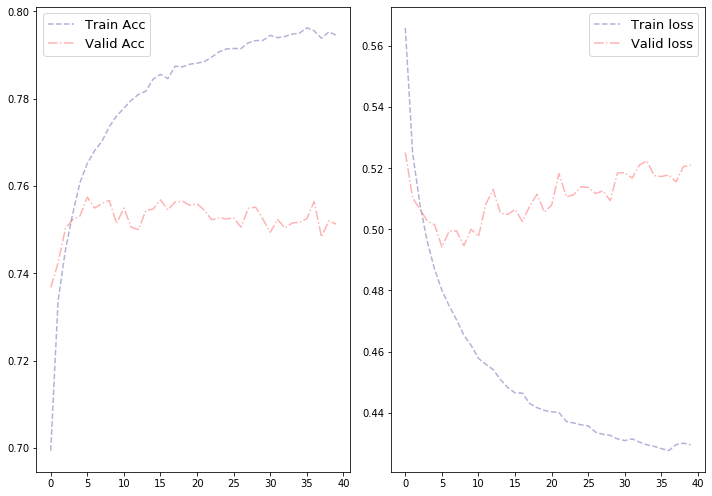

In [98]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_acc)), train_acc, linestyle='--', color='navy', alpha=0.3, label='Train Acc')
plt.plot(range(len(train_acc)), test_acc, linestyle='-.', color='red', alpha=0.3, label='Valid Acc')
plt.legend(fontsize=13)
plt.subplot(1, 2, 2)
plt.plot(range(len(train_acc)), train_loss, linestyle='--', color='navy', alpha=0.3, label='Train loss')
plt.plot(range(len(train_acc)), valid_loss, linestyle='-.', color='red', alpha=0.3, label='Valid loss')
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()